<a href="https://colab.research.google.com/github/Cfparra7/UNAD/blob/master/Cristian_parra__203008072_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import pearsonr



Paso 1: cargue de la base

In [149]:
 df_1 = pd.read_csv('dynamic_pricing.csv')
df_1.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


# paso 2  Desarrolo
Desarrollo del Infome de Actividades

### Analisis Unidimensional

1. Realizar una tabla de diccionario de datos que tenga tres columnas: Nombre de la variable, descripcion de la variable y clasificacion en numerica o categorica de otra.

In [150]:
df_dic = []

for column in df_1.columns:
    if df_1[column].dtype == 'object':
        classification = 'Categorica'
    elif df_1[column].dtype == 'int64' or df_1[column].dtype == 'float64':
        classification = 'Numerica'
    else:
        classification = 'Otra'
    df_dic.append([column, '', classification])

df_dic = pd.DataFrame(df_dic, columns=['Nombre de la variable', 'Descripcion de la variable', 'Clasificacion'])
df_dic

,Nombre de la variable,Descripcion de la variable,Clasificacion
0,Number_of_Riders,,Numerica
1,Number_of_Drivers,,Numerica
2,Location_Category,,Categorica
3,Customer_Loyalty_Status,,Categorica
4,Number_of_Past_Rides,,Numerica
5,Average_Ratings,,Numerica
6,Time_of_Booking,,Categorica
7,Vehicle_Type,,Categorica
8,Expected_Ride_Duration,,Numerica
9,Historical_Cost_of_Ride,,Numerica


2. Realizar las tablas de distribuccion de frecuencias graficas de cada unas de las varibales categoricas, colocando para dada una, us correspondiente interpretación descriptiva.

In [151]:
categorica_col = df_dic[df_dic['Clasificacion'] == 'Categorica']['Nombre de la variable'].tolist()
categorica_col

['Location_Category',
 'Customer_Loyalty_Status',
 'Time_of_Booking',
 'Vehicle_Type']

                         Frecuencia Absoluta  Frecuencia Relativa
Customer_Loyalty_Status                                          
Silver                                   367                0.367
Regular                                  320                0.320
Gold                                     313                0.313


<ipython-input-152-958575838806>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Customer_Loyalty_Status', data=df_1, palette='viridis')


Text(0.5, 1.0, 'Distribución de Customer_Loyalty_Status')

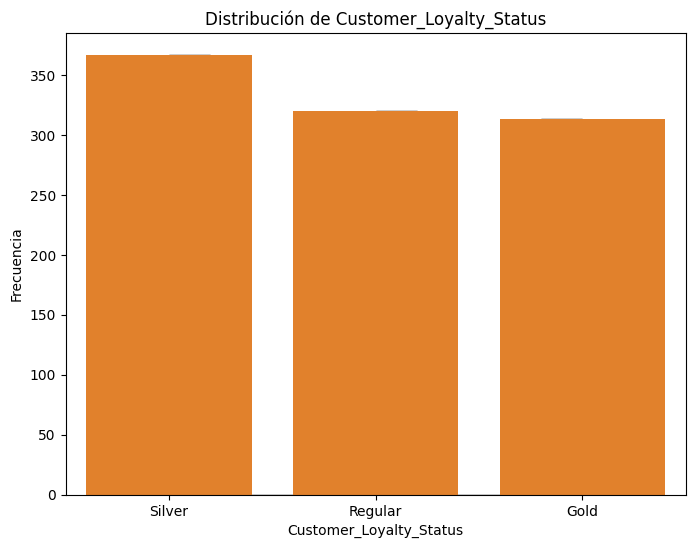

In [152]:
## tabla de frecuencia relativa y absoluta de la columa de customer_loyalty_status
categorica_customer = df_1['Customer_Loyalty_Status']
tabla_frecuencia_customer = categorica_customer.value_counts().to_frame(name='Frecuencia Absoluta')
tabla_frecuencia_customer['Frecuencia Relativa'] = tabla_frecuencia_customer['Frecuencia Absoluta'] / len(categorica_customer)
print (tabla_frecuencia_customer)

## grafico
plt.figure(figsize=(8, 6))
plt.hist(categorica_customer,  edgecolor='black')
plt.xlabel('Customer_Loyalty_Status')
sns.countplot(x='Customer_Loyalty_Status', data=df_1, palette='viridis')
plt.ylabel('Frecuencia')
plt.title('Distribución de Customer_Loyalty_Status')
sns.countplot(x='Customer_Loyalty_Status', data=df_1)
plt.title('Distribución de Customer_Loyalty_Status')

La anterior distribucción de frecuencia evidecia que se tiene una mayor partición por parte de los clientes de la categoría Silver, seguido por Regular y Gold, estos dos ultimos con frecuencias muy similares

                   Frecuencia Absoluta  Frecuencia Relativa
Location_Category                                          
Urban                              346                0.346
Rural                              332                0.332
Suburban                           322                0.322


<ipython-input-153-1fb83769c75e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Location_Category', data=df_1, palette='magma')


Text(0.5, 1.0, 'Distribución de Location_Category')

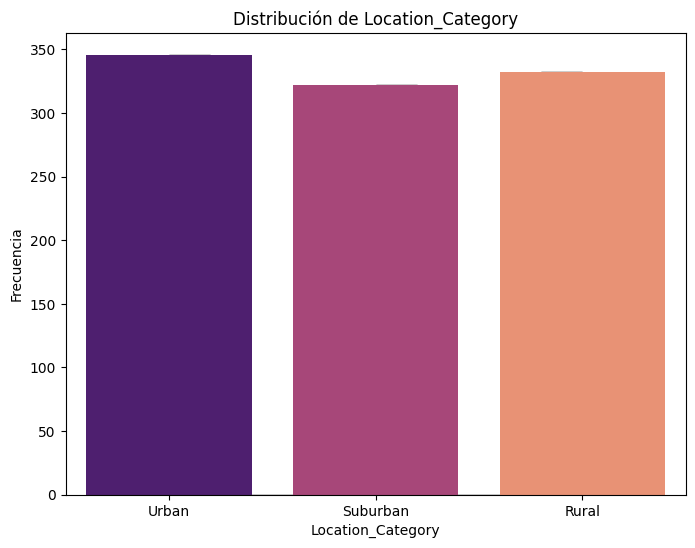

In [153]:
## tabla de frecuencia relativa y absoluta de la columa de location_category
categorica_location = df_1['Location_Category']
tabla_frecuencia_location = categorica_location.value_counts().to_frame(name='Frecuencia Absoluta')
tabla_frecuencia_location['Frecuencia Relativa'] = tabla_frecuencia_location['Frecuencia Absoluta'] / len(categorica_location)
print (tabla_frecuencia_location)

## grafico
plt.figure(figsize=(8, 6))
plt.hist(categorica_location,  edgecolor='black')
sns.countplot(x='Location_Category', data=df_1, palette='magma')
plt.xlabel('Location_Category')
plt.ylabel('Frecuencia')
plt.title('Distribución de Location_Category')

Como se evidencia en la anterior grafica la Distribución por locaclización se encuentra muy equilibrada entre las tres categorías, no obstante la categoria urbana tiene una mayor representación

                 Frecuencia Absoluta  Frecuencia Relativa
Time_of_Booking                                          
Night                            276                0.276
Afternoon                        247                0.247
Morning                          246                0.246
Evening                          231                0.231


<ipython-input-154-52738609e64d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Time_of_Booking', data=df_1, palette='magma')


Text(0.5, 1.0, 'Distribución de Time_of_Booking')

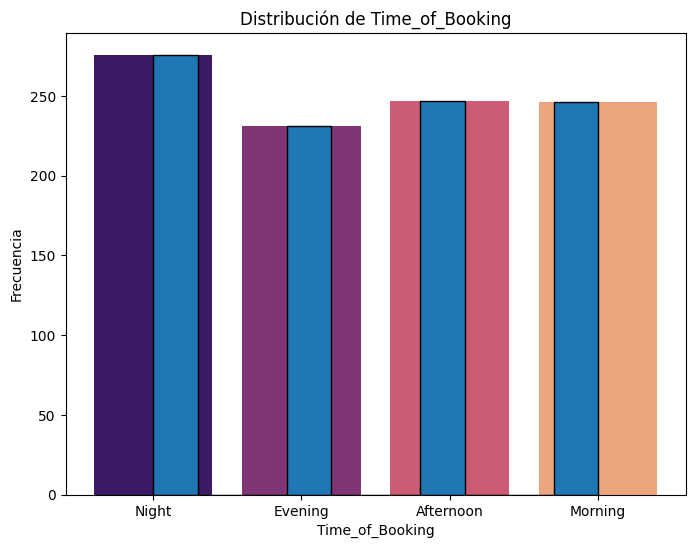

In [154]:
## tabla de frecuencia relativa y absoluta de la columa de location_category
categorica_booking = df_1['Time_of_Booking']
tabla_frecuencia_booking = categorica_booking.value_counts().to_frame(name='Frecuencia Absoluta')
tabla_frecuencia_booking['Frecuencia Relativa'] = tabla_frecuencia_booking['Frecuencia Absoluta'] / len(categorica_booking)
print (tabla_frecuencia_booking)

#grafico
plt.figure(figsize=(8, 6))
sns.countplot(x='Time_of_Booking', data=df_1, palette='magma')
plt.title('Distribución de Time_of_Booking')
plt.hist(categorica_booking,  edgecolor='black')
plt.xlabel('Time_of_Booking')
plt.ylabel('Frecuencia')
plt.title('Distribución de Time_of_Booking')

finalmente la varible categorica del tiempo en el que se hace la reserva, evidencia que nuestros clientes  tiene una frecuencia mayoe en la horas de la noche para realizar sus comprar y reservas, seguido en proporciones similares con diferencias bajas entre la tarde y mañana.

3. calcular las medidas de resumen de número de viajeros, calificación, expectativa de duración del viaje y costo histórico del viaje realizar su correpondiente descripción descriptiva

In [155]:
categorica_col = df_dic[df_dic['Clasificacion'] == 'Numerica']['Nombre de la variable'].tolist()
categorica_col

['Number_of_Riders',
 'Number_of_Drivers',
 'Number_of_Past_Rides',
 'Average_Ratings',
 'Expected_Ride_Duration',
 'Historical_Cost_of_Ride']

In [156]:
##Creación del diccionario de columnas numericas para ser llamads en resume utilizando describe
descriptive_resume = ['Number_of_Riders', 'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']
resume = df_1[descriptive_resume].describe()
print(resume)


       Number_of_Riders  Average_Ratings  Expected_Ride_Duration  \
count       1000.000000      1000.000000              1000.00000   
mean          60.372000         4.257220                99.58800   
std           23.701506         0.435781                49.16545   
min           20.000000         3.500000                10.00000   
25%           40.000000         3.870000                59.75000   
50%           60.000000         4.270000               102.00000   
75%           81.000000         4.632500               143.00000   
max          100.000000         5.000000               180.00000   

       Historical_Cost_of_Ride  
count              1000.000000  
mean                372.502623  
std                 187.158756  
min                  25.993449  
25%                 221.365202  
50%                 362.019426  
75%                 510.497504  
max                 836.116419  


El análisis descriptivo del conjunto de datos revela información clave sobre las variables estudiadas. En promedio, los viajes cuentan con 60 pasajeros, con una variabilidad moderada (desviación estándar de 23.70) y un rango de 20 a 100 pasajeros. Las calificaciones promedio del servicio son altas (4.26 en promedio), con poca dispersión y un rango de 3.5 a 5.0, lo que sugiere una percepción generalmente positiva. La duración esperada de los viajes presenta una mayor variabilidad, con una media de 99.59 minutos, pero con un amplio rango de 10 a 180 minutos, lo que indica diferencias significativas en la duración de los trayectos. Finalmente, el costo histórico del viaje muestra un comportamiento altamente disperso, con un promedio de 372.50, pero valores que oscilan entre 25.99 y 836.12, lo que sugiere la existencia de factores que influyen en el precio, como la distancia o la demanda.

4.Analizar la distribución de las variables del punto 3, mediante un Boxplot o
Violín plot, realizar su correspondiente interpretación descriptiva.

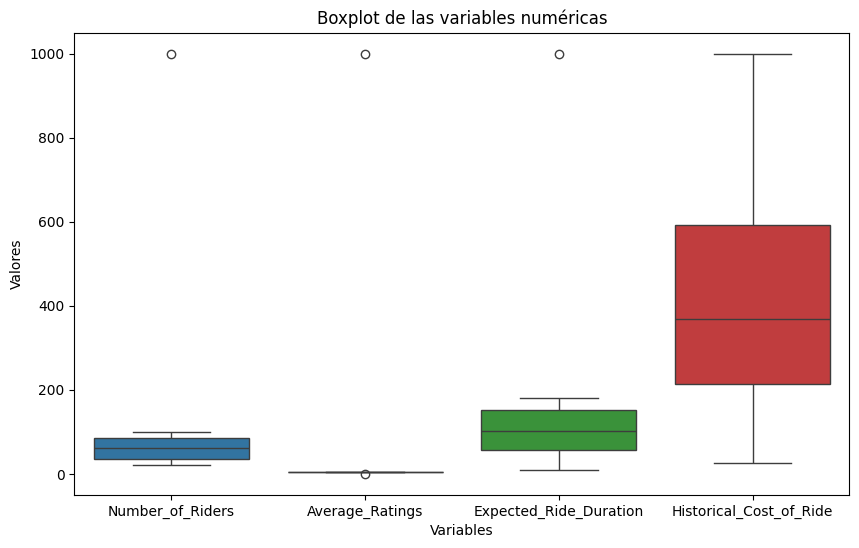

In [157]:
# grafico boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=resume[descriptive_resume])

plt.title('Boxplot de las variables numéricas')
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.show()

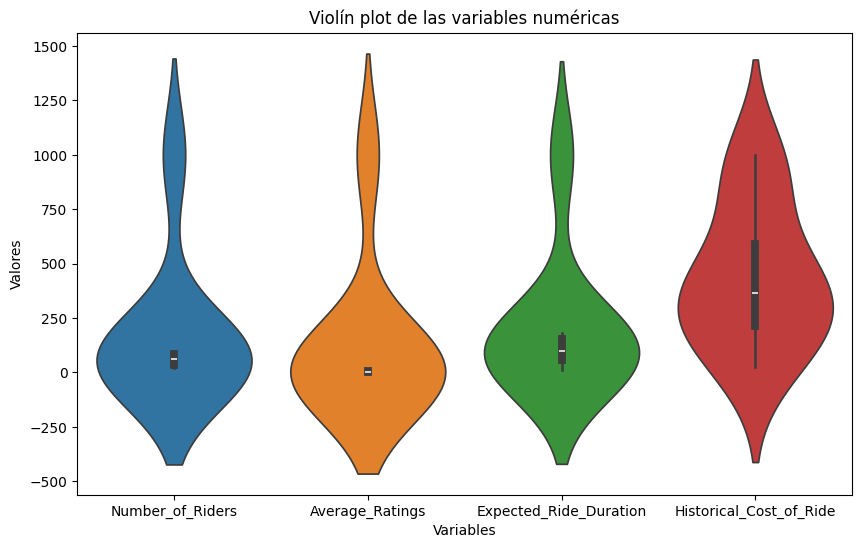

In [158]:
#grafico violin
plt.figure(figsize=(10, 6))
sns.violinplot(data=resume[descriptive_resume])

plt.title('Violín plot de las variables numéricas')
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.show()

* **Number_of_Riders:** Presenta algunos valores atípicos por encima del tercer cuartil.
* **Average_Ratings:** Se concentra alrededor de una calificación alta con poca variabilidad.
* **Expected_Ride_Duration:** Muestra una distribución considerable, con valores atípicos. La dispersión es mayor que en la calificación.
* **Historical_Cost_of_Ride:**  La mayor dispersión entre todas las variables se observa en este caso. Existe una gran variedad en los precios históricos de los viajes, con valores atípicos en ambos extremos.


### Analisis Bidimencional e inferencial

5. Analizar la correlación dos a dos entre número de viajeros, calificación,
expectativa de duración del viaje contra el costo histórico, siguiendo las
indicaciones:

<ipython-input-159-2dec26782798>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Number_of_Riders', y='Historical_Cost_of_Ride', data=df_1, alpha = 0.7, palette= "coolwarm")


Text(0.5, 1.0, 'Relación entre Número de Viajeros y Costo Histórico')

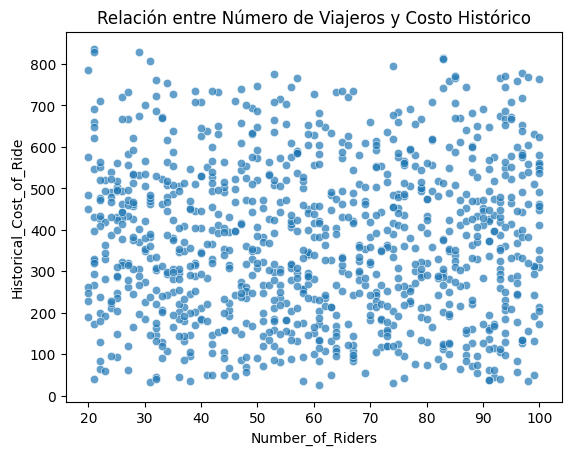

In [159]:
## número viajeros vs costo histórico
sns.scatterplot(x='Number_of_Riders', y='Historical_Cost_of_Ride', data=df_1, alpha = 0.7, palette= "coolwarm")
plt.title('Relación entre Número de Viajeros y Costo Histórico')

Text(0.5, 1.0, 'Relación entre Calificación y Costo Histórico')

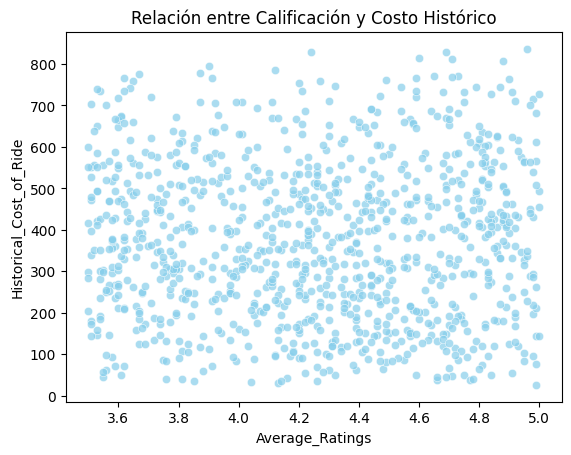

In [160]:
# relacion calificación vs costo historico
sns.scatterplot(x='Average_Ratings', y= 'Historical_Cost_of_Ride', data=df_1, alpha = 0.7, color= 'skyblue')
plt.title('Relación entre Calificación y Costo Histórico')

Text(0.5, 1.0, 'Relación entre Expectativa de Duración del Viaje y Costo Histórico')

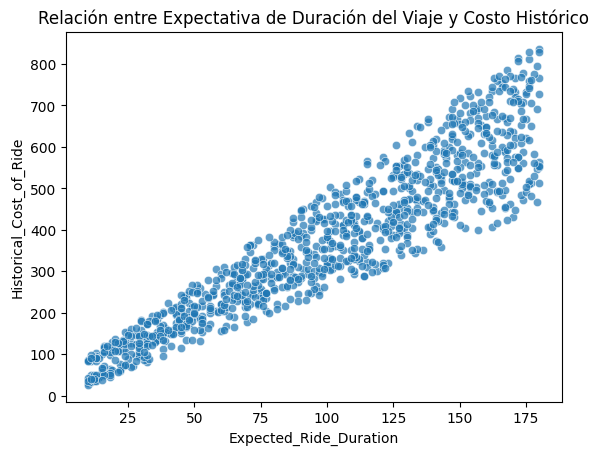

In [161]:
#relacin entre expectativa de duracion del viaje y costo historico
sns.scatterplot(x='Expected_Ride_Duration', y= 'Historical_Cost_of_Ride', data=df_1, alpha = 0.7)
plt.title('Relación entre Expectativa de Duración del Viaje y Costo Histórico')

#Pendiente la correlaciones

                         Number_of_Riders  Average_Ratings  \
Number_of_Riders                 1.000000         0.008572   
Average_Ratings                  0.008572         1.000000   
Expected_Ride_Duration          -0.015856        -0.016968   
Historical_Cost_of_Ride          0.005826        -0.001063   

                         Expected_Ride_Duration  Historical_Cost_of_Ride  
Number_of_Riders                      -0.015856                 0.005826  
Average_Ratings                       -0.016968                -0.001063  
Expected_Ride_Duration                 1.000000                 0.927547  
Historical_Cost_of_Ride                0.927547                 1.000000  


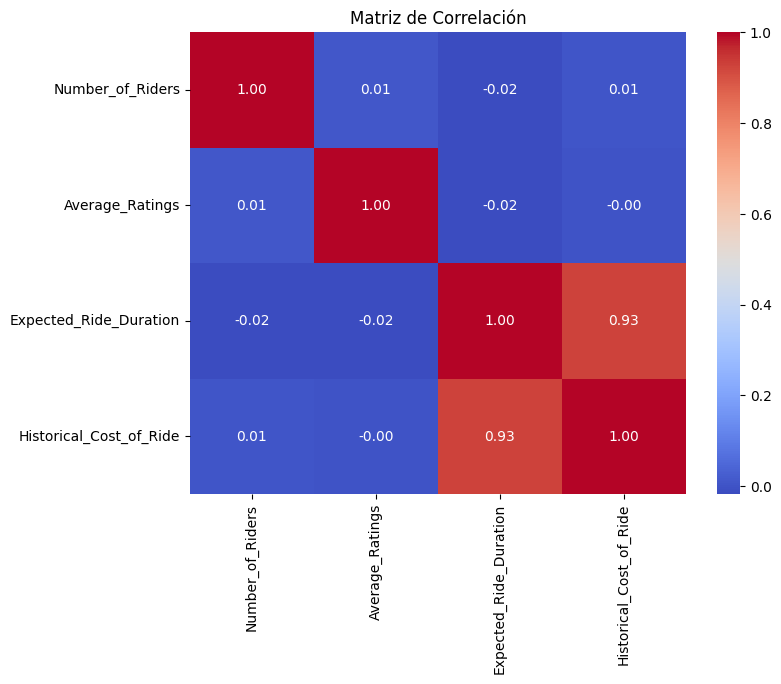

In [162]:
# Correlación de pearson entre numero de viajeros vs costo historico, calificaci[on vs costo historico y expetactiva de duración del viaje vs costo historico
corr_matrix = df_1[['Number_of_Riders', 'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']].corr(method='pearson')
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


In [163]:
# prueba de correlación
# Prueba de correlación entre Número de Viajeros y Costo Histórico
correlation_riders, p_value_riders = pearsonr(df_1['Number_of_Riders'], df_1['Historical_Cost_of_Ride'])
print(f'Coeficiente de Pearson:{correlation_riders}')
print(f'Valor p:{p_value_riders}')
if p_value_riders < 0.05:
    print("✅ La correlación es estadísticamente significativa.")
else:
    print("❌ No hay suficiente evidencia para afirmar que la correlación es significativa.")

Coeficiente de Pearson:0.0058257005120089765
Valor p:0.854016613635989
❌ No hay suficiente evidencia para afirmar que la correlación es significativa.


In [164]:
#Prueba de correlacion entre clasificación y costo historico del viaje
correlation_ratings, p_value_ratings = pearsonr(df_1['Average_Ratings'], df_1['Historical_Cost_of_Ride'])
print(f'Coeficiente de Pearson:{correlation_ratings}')
print(f'Valor p:{p_value_ratings}')
if p_value_ratings < 0.05:
    print("✅ La correlación es estadísticamente significativa.")
else:
    print("❌ No hay suficiente evidencia para afirmar que la correlación es significativa.")

Coeficiente de Pearson:-0.0010633418406516895
Valor p:0.9732090610418102
❌ No hay suficiente evidencia para afirmar que la correlación es significativa.


In [165]:
#prueba de corelacion entre la duracion del viaje y costo del viajes
correlation_duration, p_value_duration = pearsonr(df_1['Expected_Ride_Duration'], df_1['Historical_Cost_of_Ride'])
print(f'Coeficiente de Pearson:{correlation_duration}')
print(f'Valor p:{p_value_duration}')
if p_value_duration < 0.05:
    print("✅ La correlación es estadísticamente significativa.")
else:
    print("❌ No hay suficiente evidencia para afirmar que la correlación es significativa.")

Coeficiente de Pearson:0.9275471833882493
Valor p:0.0
✅ La correlación es estadísticamente significativa.


6. Analizar las asociaciones estado de fidelidad del cliente, reservación y tipo de vehículo, siguiendo las indicaciones:

In [166]:
# tabla de contigencia
tabla_vehicle_loyalty = pd.crosstab(df_1['Customer_Loyalty_Status'], df_1['Vehicle_Type'])
tabla_vehicle_loyalty

Vehicle_Type,Economy,Premium
Customer_Loyalty_Status,,
Gold,153,160
Regular,144,176
Silver,181,186


In [167]:
#tabla de contigencia
tabla_booking_vehicle = pd.crosstab(df_1['Time_of_Booking'], df_1['Vehicle_Type'])
tabla_booking_vehicle

Vehicle_Type,Economy,Premium
Time_of_Booking,,
Afternoon,123,124
Evening,98,133
Morning,121,125
Night,136,140


In [168]:
#tabla de contingencia
tabla_location_vehicle = pd.crosstab(df_1['Location_Category'], df_1['Vehicle_Type'])
tabla_location_vehicle

Vehicle_Type,Economy,Premium
Location_Category,,
Rural,153,179
Suburban,158,164
Urban,167,179


In [169]:
#prueba chi

chi2, p, dof, expected = chi2_contingency(tabla_vehicle_loyalty)
print(f'Valor Chi-cuadrado: {chi2}')
print(f'Valor p: {p}')
print(f'Grados de libertad: {dof}')
print('Frecuencias esperadas:\n', expected)
if p < 0.05:
    print("✅ Existe una asociación significativa entre las variables.")
else:
    print("❌ No hay suficiente evidencia para afirmar que existe una asociación significativa.")

Valor Chi-cuadrado: 1.4915570662552207
Valor p: 0.47436484739478013
Grados de libertad: 2
Frecuencias esperadas:
 [[149.614 163.386]
 [152.96  167.04 ]
 [175.426 191.574]]
❌ No hay suficiente evidencia para afirmar que existe una asociación significativa.


In [170]:
# prueba chi
chi2, p, dof, expected = chi2_contingency(tabla_booking_vehicle)
print(f'Valor Chi-cuadrado: {chi2}')
print(f'Valor p: {p}')
print(f'Grados de libertad: {dof}')
print('Frecuencias esperadas:\n', expected)

if p< 0.05 :
  print("✅ Existe una asociación significativa entre las variables.")
else:
  print("❌ No hay suficiente evidencia para afirmar que existe una asociación significativa.")

Valor Chi-cuadrado: 3.500868231822323
Valor p: 0.3206495315079586
Grados de libertad: 3
Frecuencias esperadas:
 [[118.066 128.934]
 [110.418 120.582]
 [117.588 128.412]
 [131.928 144.072]]
❌ No hay suficiente evidencia para afirmar que existe una asociación significativa.


Valor Chi-cuadrado: 0.6293492117214362
Valor p: 0.7300263819313622
Grados de libertad: 2
Frecuencias esperadas:
 [[158.696 173.304]
 [153.916 168.084]
 [165.388 180.612]]
❌ No hay suficiente evidencia para afirmar que existe una asociación significativa.


Text(0.5, 1.0, 'Tabla de Contingencia: Location_Category vs Vehicle_Type')

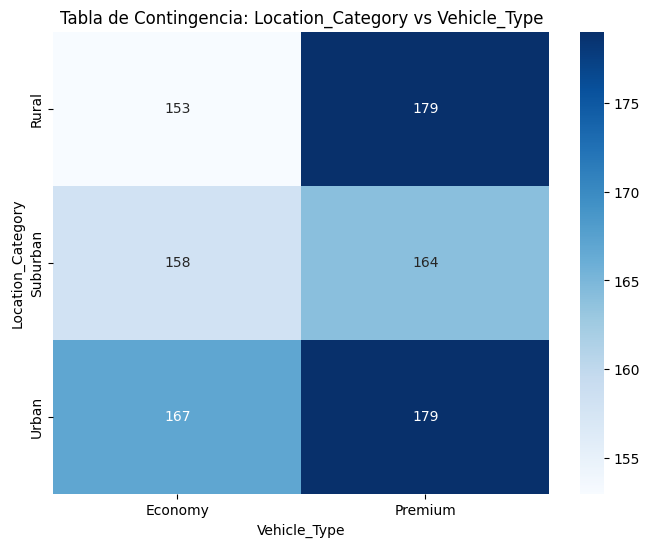

In [171]:
#prueba chi
chi2, p, dof, expected = chi2_contingency(tabla_location_vehicle)
print(f'Valor Chi-cuadrado: {chi2}')
print(f'Valor p: {p}')
print(f'Grados de libertad: {dof}')
print('Frecuencias esperadas:\n', expected)

if p< 0.05 :
  print("✅ Existe una asociación significativa entre las variables.")
else:
  print("❌ No hay suficiente evidencia para afirmar que existe una asociación significativa.")

plt.figure(figsize=(8, 6))
sns.heatmap(tabla_location_vehicle, annot=True, cmap='Blues', fmt='g')
plt.title('Tabla de Contingencia: Location_Category vs Vehicle_Type')

F-Estadístico: 0.8694
❌ No hay diferencias significativas entre los grupos.


Text(0.5, 1.0, 'Boxplot de Costo Histórico por Estado de Fidelidad del Cliente')

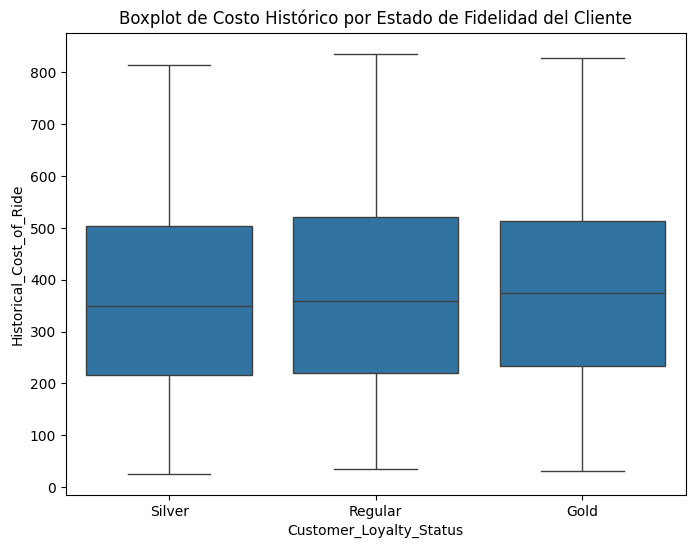

In [172]:
#anova test
anova_result = stats. f_oneway(df_1['Historical_Cost_of_Ride'][df_1['Customer_Loyalty_Status'] == 'Gold'],
                               df_1['Historical_Cost_of_Ride'][df_1['Customer_Loyalty_Status'] == 'Silver'])
print(f"F-Estadístico: {anova_result.statistic:.4f}")
# Interpretación
if anova_result.pvalue < 0.05:
    print("✅ Hay diferencias significativas entre los grupos.")
else:
    print("❌ No hay diferencias significativas entre los grupos.")

plt.figure(figsize=(8, 6))
sns.boxplot(x='Customer_Loyalty_Status', y='Historical_Cost_of_Ride', data=df_1)
plt.title('Boxplot de Costo Histórico por Estado de Fidelidad del Cliente')

F-Estadístico: 0.6797
❌ No hay diferencias significativas entre los grupos.


Text(0.5, 1.0, 'Boxplot de Costo Histórico por Tiempo de Reserva')

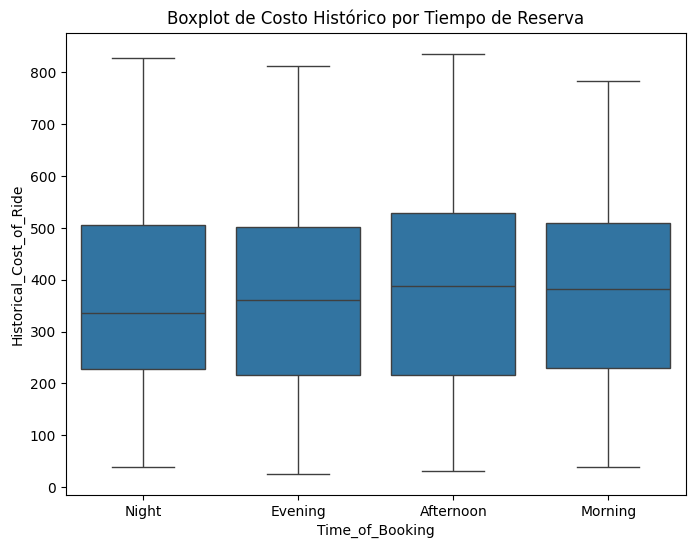

In [173]:
# anova test
anova_result = stats. f_oneway(df_1['Historical_Cost_of_Ride'][df_1['Time_of_Booking'] == 'Morning'],
                               df_1['Historical_Cost_of_Ride'][df_1['Time_of_Booking'] == 'Evening'])
print(f"F-Estadístico: {anova_result.statistic:.4f}")
# Interpretación
if anova_result.pvalue < 0.05:
    print("✅ Hay diferencias significativas entre los grupos.")
else:
    print("❌ No hay diferencias significativas entre los grupos.")

plt.figure(figsize=(8, 6))
sns.boxplot(x='Time_of_Booking', y='Historical_Cost_of_Ride', data=df_1)
plt.title('Boxplot de Costo Histórico por Tiempo de Reserva')

F-Estadístico: 0.6620
❌ No hay diferencias significativas entre los grupos.


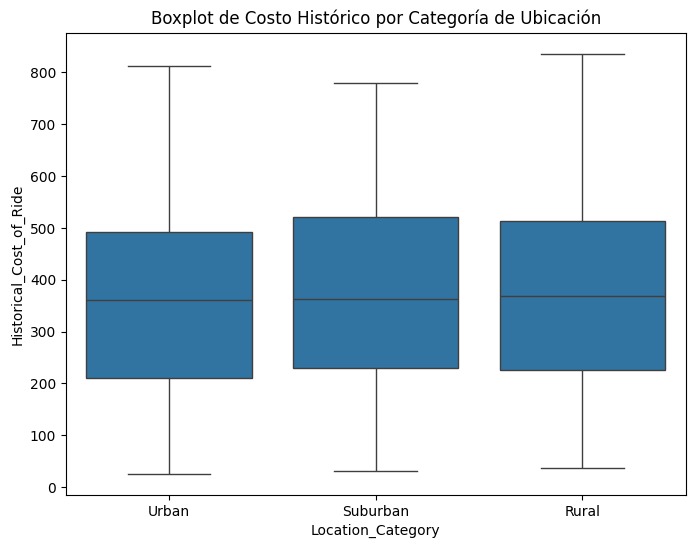

In [174]:
#anova test
anova_result = stats. f_oneway(df_1['Historical_Cost_of_Ride'][df_1['Location_Category'] == 'Urban'],
                               df_1['Historical_Cost_of_Ride'][df_1['Location_Category'] == 'Rural'],
                               df_1['Historical_Cost_of_Ride'][df_1['Location_Category'] == 'Suburban'])
print(f"F-Estadístico: {anova_result.statistic:.4f}")
plt.figure(figsize=(8, 6))
sns.boxplot(x='Location_Category', y='Historical_Cost_of_Ride', data=df_1)
plt.title('Boxplot de Costo Histórico por Categoría de Ubicación')
# Interpretación
if anova_result.pvalue < 0.05:
    print("✅ Hay diferencias significativas entre los grupos.")
else:
    print("❌ No hay diferencias significativas entre los grupos.")




<ipython-input-176-d0fef9807cf7>:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='Location_Category', y='Historical_Cost_of_Ride', data=df_1, inner='quart',  palette="magma", scale='count', hue='Time_of_Booking')


Text(0.5, 1.0, 'Violín plot de Costo Histórico por Categoría de Ubicación')

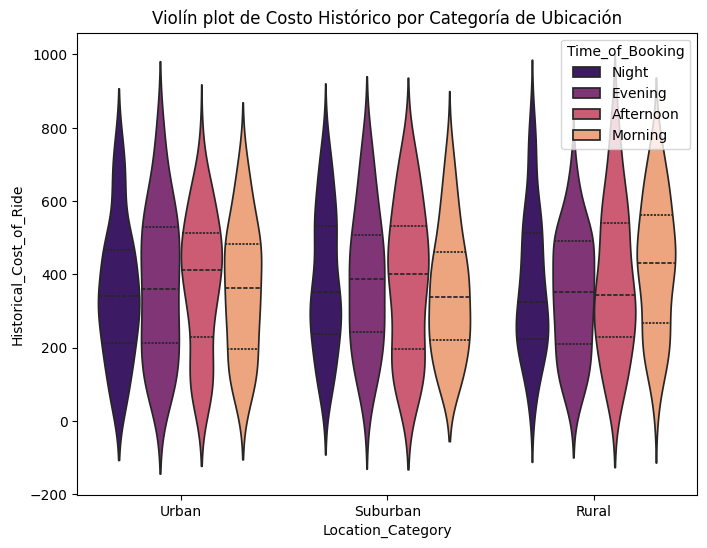

In [176]:
#violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Location_Category', y='Historical_Cost_of_Ride', data=df_1, inner='quart',  palette="magma", scale='count', hue='Time_of_Booking')
plt.title('Violín plot de Costo Histórico por Categoría de Ubicación')